In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')
import cv2

In [2]:
diry=r'A:\sem6\DL\dogscats\train'
categories=['cats','dogs']

In [22]:
img_size=110
data=[]
labels=[]

for category in categories:
    folder=os.path.join(diry,category)
    label=categories.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        data.append(img_path)
        labels.append(label)
print(data[0])
print(labels[0])

A:\sem6\DL\dogscats\train\cats\cat.0.jpg
0


In [27]:
df=pd.DataFrame()
df['images']=data
df['label']=labels
df=df.sample(frac=1).reset_index(drop=True)#shuffle data
df.head()

,images,label
0,A:\sem6\DL\dogscats\train\dogs\dog.10605.jpg,1
1,A:\sem6\DL\dogscats\train\cats\cat.11246.jpg,0
2,A:\sem6\DL\dogscats\train\cats\cat.1562.jpg,0
3,A:\sem6\DL\dogscats\train\cats\cat.3859.jpg,0
4,A:\sem6\DL\dogscats\train\cats\cat.7662.jpg,0


# EDA

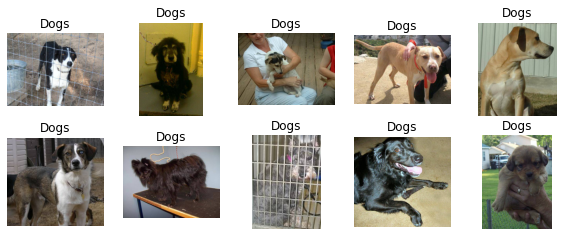

In [31]:
plt.figure(figsize=(10,10))
temp=df[df['label']==1]['images']
start=random.randint(0,len(temp))
files=temp[start:start+10]

for i,file in enumerate(files):
    plt.subplot(5,5,i+1)
    img=load_img(file)
    img=np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

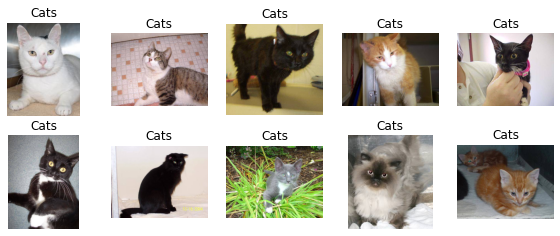

In [32]:
plt.figure(figsize=(10,10))
temp=df[df['label']==0]['images']
start=random.randint(0,len(temp))
files=temp[start:start+10]

for i,file in enumerate(files):
    plt.subplot(5,5,i+1)
    img=load_img(file)
    img=np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

<AxesSubplot:xlabel='label', ylabel='count'>

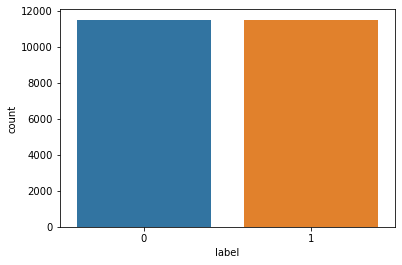

In [33]:
import seaborn as sns
sns.countplot(df['label'])

# Create Data Generator for images

In [38]:
df['label']=df['label'].astype('str')
df.head()

,images,label
0,A:\sem6\DL\dogscats\train\dogs\dog.10605.jpg,1
1,A:\sem6\DL\dogscats\train\cats\cat.11246.jpg,0
2,A:\sem6\DL\dogscats\train\cats\cat.1562.jpg,0
3,A:\sem6\DL\dogscats\train\cats\cat.3859.jpg,0
4,A:\sem6\DL\dogscats\train\cats\cat.7662.jpg,0


In [66]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=50)

In [69]:
from keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1./255, #to convert image range b/w 0to1 from 0to255
                              rotation_range=40,#augmatation to avoid overfitting
                              shear_range=0.2,zoom_range=0.2,
                              horizontal_flip=True,fill_mode='nearest'
                             )

val_gen=ImageDataGenerator(rescale=1./255)

train_iterator=train_gen.flow_from_dataframe(train,x_col='images',y_col='label',target_size=(128,128),
                                            batch_size=64,class_mode='binary')

val_iterator=train_gen.flow_from_dataframe(test,x_col='images',y_col='label',target_size=(128,128),
                                            batch_size=64,class_mode='binary')

Found 18400 validated image filenames belonging to 2 classes.
Found 4600 validated image filenames belonging to 2 classes.


# Model Creation

In [56]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.layers import Dropout

In [82]:
model=Sequential()

model.add(Conv2D(16,(3,3),padding='SAME',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [83]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 64, 64, 16)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 32, 32, 32)       

In [84]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [85]:
history=model.fit(train_iterator,epochs=5,validation_data=val_iterator)

Epoch 1/5
288/288 [==============================] - 1257s 4s/step - loss: 0.7187 - accuracy: 0.5223 - val_loss: 0.6918 - val_accuracy: 0.5374
Epoch 2/5
288/288 [==============================] - 966s 3s/step - loss: 0.6866 - accuracy: 0.5411 - val_loss: 0.6875 - val_accuracy: 0.5604
Epoch 3/5
288/288 [==============================] - 973s 3s/step - loss: 0.6760 - accuracy: 0.5871 - val_loss: 0.6802 - val_accuracy: 0.5685
Epoch 4/5
288/288 [==============================] - 948s 3s/step - loss: 0.6657 - accuracy: 0.6094 - val_loss: 0.6720 - val_accuracy: 0.5791
Epoch 5/5
288/288 [==============================] - 949s 3s/step - loss: 0.6548 - accuracy: 0.6285 - val_loss: 0.6469 - val_accuracy: 0.6513


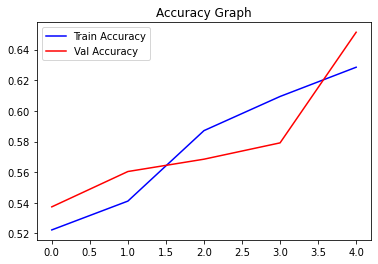

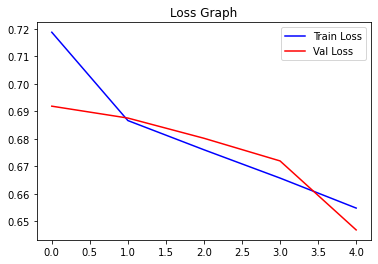

<Figure size 432x288 with 0 Axes>

In [86]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Train Accuracy')
plt.plot(epochs,val_acc,'r',label='Val Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,'b',label='Train Loss')
plt.plot(epochs,val_loss,'r',label='Val Loss')
plt.title('Loss Graph')
plt.legend()
plt.figure()
plt.show()

# Prediction on New Data

In [100]:
imgt=r'A:\sem6\DL\dogscats\test\cat\cattest.jpg'

In [101]:
img=image.load_img(imgt,target_size=(128,128))
images=image.img_to_array(img)
images=np.expand_dims(images,axis=0)
prediction=model.predict(images)

In [103]:
print(prediction)

[[0.]]


In [104]:
if prediction==0:
    print('Cat')
else:
    print('Dog')

Cat
